In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

In [5]:
from sklearn.metrics import f1_score
y_act=[1,1,0,0,0,1]
y_pred=[1,1,0,1,1,0]
f1_score(y_act,y_pred)

0.5714285714285715

Number of datapoints in training set: 307
Number of dimensions/features: 2
[[13.409 13.763]
 [14.196 15.853]
 [14.915 16.174]
 [13.577 14.043]]


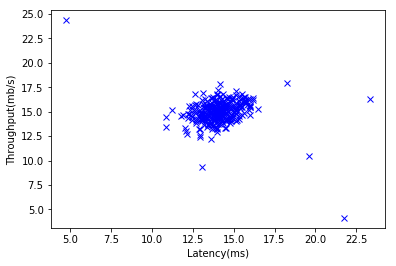

In [12]:
#tr_data=read_dataset('tr_server_data.csv')
#cv_data=read_dataset('cv_server_data.csv')
#get_data=read_dataset('get_server_data.csv')
import csv
import numpy
filename='tr_server_data.csv'
a2='cv_server_data.csv'
a3='gt_server_data.csv'
raw_data=open(filename,'rt')
reader=csv.reader(raw_data,delimiter=',',quoting=csv.QUOTE_NONE)
x=list(reader)
tr_data=numpy.array(x).astype('float')
raw_data=open(a2,'rt')
reader=csv.reader(raw_data,delimiter=',',quoting=csv.QUOTE_NONE)
x=list(reader)
cv_data=numpy.array(x).astype('float')
raw_data=open(a3,'rt')
reader=csv.reader(raw_data,delimiter=',',quoting=csv.QUOTE_NONE)
x=list(reader)
gt_data=numpy.array(x).astype('float')
n_training_samples=tr_data.shape[0]
n_dim=tr_data.shape[1]
print('Number of datapoints in training set: %d'%n_training_samples)
print('Number of dimensions/features: %d'%n_dim)
print(tr_data[1:5,:])
plt.xlabel('Latency(ms)')
plt.ylabel('Throughput(mb/s)')
plt.plot(tr_data[:,0],tr_data[:,1],'bx')
plt.show()

In [15]:
#def read_dataset(filePath,delimiter=','):
   #return genfromtxt(filePath,delimiter=delimiter)
def estimateGuassian(dataset):
    mu=np.mean(dataset,axis=0)
    sigma=np.cov(dataset.T)
    return mu,sigma
def multivariateGaussian(dataset,mu,sigma):
    p=multivariate_normal(mean=mu,cov=sigma)
    return p.pdf(dataset)
def selectThresholdByCV(probs,gt):
    best_epsilon=0
    best_f1=0
    f=0
    stepsize=(max(probs)-min(probs))/1000
    epsilons=np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions=(probs<epsilon)
        print("predictions",predictions)
        f=f1_score(gt,predictions)
        print(f)
        #print("-----")
        if f>best_f1:
            #print('-------')
            best_f1=f
        print(predictions)
    return best_f1,best_epsilon

In [ ]:
mu,sigma=estimateGaussian(tr_data)


In [ ]:
#selecting outlier datapoints
outliers=np.asarray(np.where(p<np))